# PhoeniX OpenCV ile Görüntü İşleme Çalışması
Merhaba! bu çalışmada OpenCV ile görüntü işlemeyi ve bu işlemleri otonom araçlar için kulanmayı öğreneceğiz. 

## Görüntü İşleme nedir?
Görüntü işleme kısaca dijital formdaki bir görüntünün analiz, dönüşüm ve oluşturulmasını içeren bilgisayar bilimi alanıdır. Görüntü işleme sayesinde kameralardan alınan veriler analiz edilebilir. Görüntü işleme birçok işlem için kullanılabilir. Bunlardan bazıları güvenlik kameraları, plaka tanıma ve tabiki otonom araçlardır.

## OpenCV ne ola ki?
Görüntü İşleme işlemlerini yapmak için yazılmış kütüphaneler vardır. OpenCV kütüphanesi en geniş çaplı açık kaynaklı görüntü işleme kütüphanesidir.

O zaman haydi başlayalım!

# OpenCV Kurulumu
Google Colab'da OpenCV'yi kurmak için aşağıdaki kod satırını çalıştırmak gerekiyor.

In [157]:
!pip install opencv-python

# OpenCV’yi Python Script’ine İlave Etmek
OpenCV diğer tüm kütüphaneler gibi import komutuyla python’da kullanılır. Bazı işlemlerde gerektiği için Numpy kütüphanesini de import ediyoruz.


In [0]:
import cv2
import numpy as np

# Çıktıları görselleştirmek için
import matplotlib.pyplot as plt
%matplotlib inline

# Bir Resmi Yüklemek
Bir resmi OpenCV ile yüklemek için genel olarak `imread()` fonksiyonu kullanılır. 

Google Colab'ın resim formatı RGB değil BGR olduğundan dolayı resimlerin renkleri ilk yüklediğinizde yanlış görünecektir.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1392k  100 1392k    0     0  10.7M      0 --:--:-- --:--:-- --:--:-- 10.7M


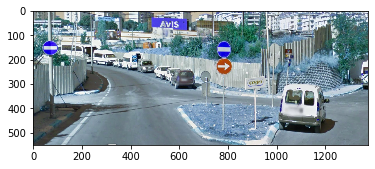

In [159]:
# Curl işlemi ile resmi indir, image.jpg olarak kaydet
!curl -o image.jpg https://cihanbosnali.com/img/rcmakers/2.png

image = cv2.imread("image.jpg")

# Matplotlib kullanarak resmi göster
plt.imshow(image)

# Basit Resim İşlemleri
* Kırpma
* Bulanıklaştırma

## Kırpma
Her zaman elimizdeki resmin tamamına ihtiyaç olmuyor. Numpy kullanılarak resmin sadece belli bir kısmını alabilirsiniz.

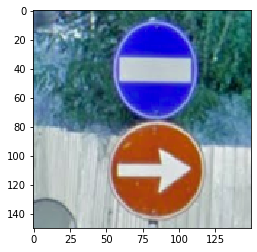

In [160]:
image_crop = image[120:270, 700:850] # İlk önce Y, sonra X ekseninde kırpma yazılıyor. image[Y1:Y2, X1:X2]
plt.imshow(image_crop)

Resmin uzunluk bilgilerini kullanarak işlem yapmak için `image.shape` özelliğini kullanıyoruz.

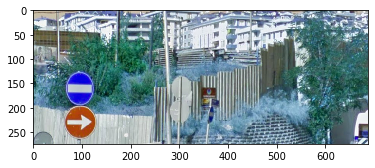

In [161]:
yhalf = int(image.shape[0]/2)
xhalf = int(image.shape[1]/2)
image_c = image[0:yhalf, xhalf:image.shape[1]]
plt.imshow(image_c)

## Bulanıklaştırma
Detaylar bazı durumlarda iyi olmuyor. Fazla renk detayları nedeniyle algoritmanızdaki işlemler çalışmayabilir. Bu durumlarda resmin biraz bulanıklaştırılması kullanılır. Aşağıda bulanıklaştırma için kullanılan farklı yöntemleri görebilirsiniz.

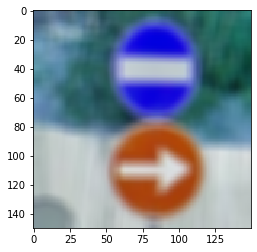

In [162]:
blur = cv2.blur(image_crop,(9,9))
plt.imshow(blur)

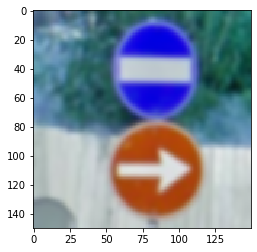

In [163]:
blur = cv2.GaussianBlur(image_crop,(9,9),0)
plt.imshow(blur)

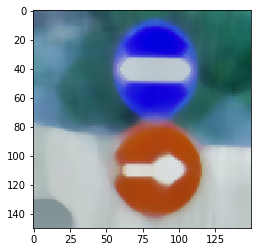

In [164]:
blur = cv2.medianBlur(image_crop,13)
plt.imshow(blur)

# Renk Uzayları
Renk uzayı dijital olarak her rengin tek bir nokta olarak temsil edildiği bir koordinat sistemidir. Örneğin her rengin kırmızı, yeşil ve mavi ile ifade edilebileceğini bilirsiniz. Bu mantığa dayalı olarak oluşturulan RGB (Red, Green, Blue) renk uzayında x,y,z eksenleri yerine bu üç rengin geçtiği ve bu renkleri arttırıp azaltarak renkler elde edilen bir koordinat sistemidir.

![RGB Space](https://cihanbosnali.com/img/rgb.png)

Çok kullandığımız başka bir renk uzayı ise HSV’dir. Hue, Saturation, Value ismindeki bu uzayı görüntü işlemede kullanmak çok daha kolaydır. Hue renk değerini ifade eder. Saturation, beyaz ile renkli arasında, Value, siyah ile renkli arasındadır. Bu sayede belli bir rengi veya tonu bulmak çok daha kolay olur. Bu renk uzayı ise küp yerine bir kon şeklinde ifade edilir. Konide Hue açı değeri, Saturation içerden dışarı doğru bir değer ve value derinliktir.

![HSV Space](https://cihanbosnali.com/img/hsv.png)

OpenCV’yi kullanarak resmin hangi renk uzayı kullanılarak ifade edildiğini değiştirebilirsiniz. Bu işlem için `cvtColor()` fonksiyonu kullanılır.


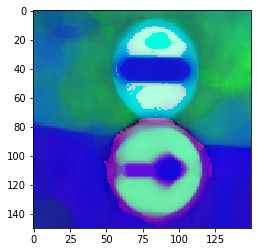

In [165]:
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

## Renk Tespiti
Renk uzayında düşük ve yüksek eşik değeri arasındaki değerleri seçmek için `inRange` fonksiyonu kullanılır. 

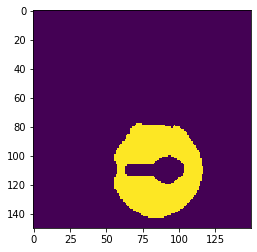

In [166]:
# Düşük eşik değeri:
lower = np.array([90,50,50])

# Yüksek eşik değeri:
upper = np.array([120,245,245])

mask = cv2.inRange(hsv, lower, upper)
plt.imshow(mask)

## Renk ile Obje Tespiti (Contours)
Renk tespiti ile istediğimiz alanlardaki objeyi bulduk ancak bu objenin lokasyonunu ve bazı özelliklerini otonom olarak belirleyebilmek için birkaç işlem daha yapmamız gerekiyor.

Bu işlemlerden önemli bir tanesi kontür işlemleri. Kontür işlemlerini kullanarak rengini bulduğunuz objenin etrafını tam olarak kaplayan dikdörtgen veya daire şeklini bulabilirsiniz.

Aşağıdaki kod parçası ile contours’dan en büyük alan kaplayanını buluyoruz. Bazen renk tespiti ile oluşturduğumuz maskede hatalar olabiliyor ve istemediğimiz alanlarda küçük beyaz alanlar oluşuyor. En büyüğünü bularak bu sorunu çözüyoruz.



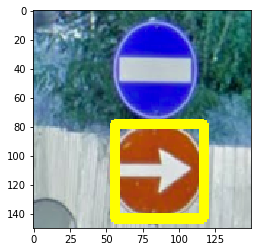

In [167]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

if len(contours):
  areas = [cv2.contourArea(c) for c in contours]
  max_index = np.argmax(areas)
  cnt=contours[max_index]  
  
  # Bulunan objeyi dikdörtgen ile işaretle
  x,y,w,h = cv2.boundingRect(cnt)
  img = cv2.rectangle(image_crop.copy(),(x,y),(x+w,y+h),(255,255,0),5)
 
  plt.imshow(img)

## Resim Üzerinde Şekil Bulma


### Dikdörtgen

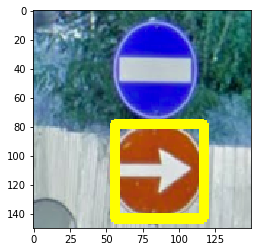

In [168]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(image_crop.copy(),(x,y),(x+w,y+h),(255,255,0),5)

plt.imshow(img)

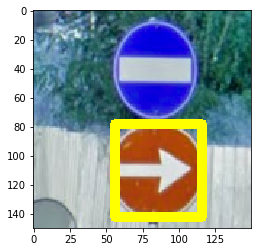

In [169]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img = cv2.drawContours(image_crop.copy(),[box],0,(255,255,0),5)

plt.imshow(img)

### Daire

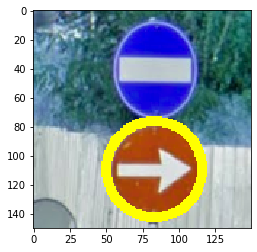

In [170]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(image_crop.copy(),center,radius,(255,255,0),5)

plt.imshow(img)

## Renk Histogramları
OpenCV'nin `calcHist` fonksiyonunu kullanarak renklerin kullanımı ile ilgili histogramlar oluşturulabilir.

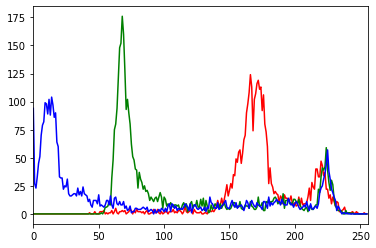

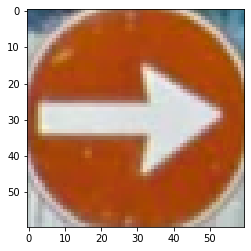

In [171]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([image_crop[80:140, 55:115]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
plt.imshow(image_crop[80:140, 55:115])

# Kenar Tespiti
Her zaman sadece renkler kullanılarak görüntü işleme işlemleri yapılamıyor. Bu durumlarda kenar tespiti gib farklı işlemler kullanılabiliyor.

## Canny algoritması
OpenCV içinde kullanılan Canny algoritması renkler arasındaki değişimi kullanarak objelerin kenarlarını bulmaktadır.

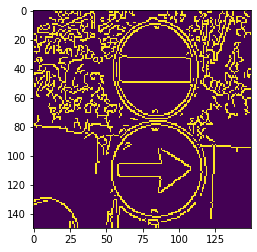

In [172]:
img_canny = cv2.Canny(image_crop.copy(), 100, 200)

plt.imshow(img_canny)

Yukarıdaki resimde arka plan çok keskin şekillere sahip olduğu için istemediğimiz kenarlar bulunuyor. Bulanıklaşmış resimi kullanarak bu durum düzeltilebilir.

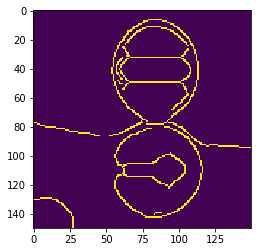

In [173]:
blur_canny = cv2.Canny(blur.copy(), 100, 200)

plt.imshow(blur_canny)

# Kalıp Eşleştirme
OpenCV'nin `template matching` yöntemiyle elimizdeki küçük bir kalıbı büyük bir resmin içinde eşleştirerek arayabiliyoruz. 

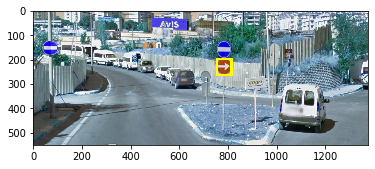

In [174]:
template = image_crop[80:140, 55:115]

res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
img_rect = cv2.rectangle(image.copy(),top_left, bottom_right, (255,255,0), 10)

plt.imshow(img_rect)

## Haar Cascade
Object detection için kullanılan genel olarak başarısız bir makine öğrenmesi yöntemidir. OpenCV tarafından geliştirimiş bazı modelleri çok iyi olsa da bir kaç işlem için olanlar haricinde iyi çalışan modellerini bulmak zordur. Kendiniz eğittiğinizde ise uzun süre çalıştırmanız gerekir.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 38068  100 38068    0     0   226k      0 --:--:-- --:--:-- --:--:--  225k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  116k  100  116k    0     0   489k      0 --:--:-- --:--:-- --:--:--  489k


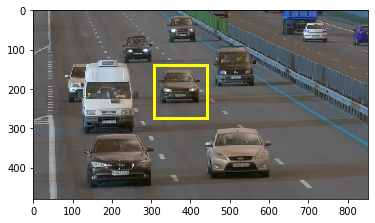

In [201]:
!curl -o imagecars.jpg https://ak6.picdn.net/shutterstock/videos/17970226/thumb/1.jpg
image_car_detect = cv2.imread("imagecars.jpg")
!curl -o cars.xml https://raw.githubusercontent.com/andrewssobral/vehicle_detection_haarcascades/master/cars.xml
cascade_src = 'cars.xml'

# Cascade'i yükle
car_cascade = cv2.CascadeClassifier(cascade_src)

# Resmi siyah beyaz yap
gray = cv2.cvtColor(image_car_detect, cv2.COLOR_BGR2GRAY)

# Cascade'i resime uygula
cars = car_cascade.detectMultiScale(gray, 1.3, 5)

# Çıktıyı göster
for (x,y,w,h) in cars:
        image_cars = cv2.rectangle(image_car_detect.copy(),(x,y),(x+w,y+h),(255,255,0),5)      

plt.imshow(image_cars)